# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


##### [click here to skip all printed code](#skip)

In [4]:
#url for weather map api
weather_map_url = f'https://api.openweathermap.org/data/2.5/weather?&units=imperial&appid={weather_api_key}'
#create lists/columns
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#counter to get a record and set number
record = 1
record_set = 1

#print statement for data retrieval
print('Beginning Data Retrieval')
print('-----------------------------')
#test pull to see where to grab the data from the json
# test = requests.get(f'{weather_map_url}&q={cities[1]}').json()
# print(f'{weather_map_url}&q={cities[1]}')
# print(cities[1])
# print(json.dumps(test, sort_keys=True,indent=4))
#notes for appending, split by '$'
# coord, lat $ coord, lon $ main, temp_max $  main - humidity $ clouds, all $ wind, speed $ sys,country $ date = dt $

#loop with try/except
#try to append cities with values needed | except if no values found
for city in cities:
    try:
        #pull info of each city from api into json
        response = requests.get(f'{weather_map_url}&q={city}').json()
        
        #append to each list except for city
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        #if count record hits 50 then move to next set and reset count to 1, else keep counting to 50 cities
        if record > 49:
            record = 1
            record_set += 1
            city_name.append(city)
        else:
            record += 1
            city_name.append(city)
        print(f'Processing Record {record} of Set {record_set} | {city}')
    except:
        print('City not found. Skipping...')
print('''-----------------------------
Data Retrieval Complete      
-----------------------------''')

Beginning Data Retrieval
-----------------------------
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | puerto ayora
City not found. Skipping...
City not found. Skipping...
Processing Record 4 of Set 1 | husavik
City not found. Skipping...
Processing Record 5 of Set 1 | upernavik
Processing Record 6 of Set 1 | yellowknife
City not found. Skipping...
Processing Record 7 of Set 1 | khomutovo
Processing Record 8 of Set 1 | griffith
Processing Record 9 of Set 1 | fortuna
Processing Record 10 of Set 1 | saint george
Processing Record 11 of Set 1 | cairns
Processing Record 12 of Set 1 | mahebourg
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | kapaa
City not found. Skipping...
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | sur
Processing Record 17 of Set 1 | bay roberts
Processing Record 18 of Set 1 | kabanjahe
Processing Record 19 of Set 1 | nemuro
Processing Record 20 of Set 1 | dikson
City not found. Skipping...
Processi

### did you use the skip page button ;)
<a id="skip"></a>

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
#create dataframe
weather_df = pd.DataFrame({"City": city_name, "Lat": lat, "Lng": lng, 
                           "Max Temp": max_temp, "Humidity": humidity, "Cloudiness": cloudiness, 
                           "Wind Speed": wind_speed,"Country": country, "Date": date})
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,72.55,80,99,24.40,PF,1661722342
1,puerto ayora,-0.7393,-90.3518,76.96,88,95,10.00,EC,1661722342
2,husavik,66.0449,-17.3389,49.12,66,100,1.72,IS,1661722343
3,upernavik,72.7868,-56.1549,38.84,77,43,13.49,GL,1661722344
4,yellowknife,62.4560,-114.3525,57.72,88,100,12.66,CA,1661722255
...,...,...,...,...,...,...,...,...,...
586,nhulunbuy,-12.2333,136.7667,77.61,88,100,9.22,AU,1661722598
587,uhlove,44.8215,33.6045,73.02,70,2,2.01,UA,1661722599
588,northam,51.0333,-4.2167,61.39,74,95,6.08,GB,1661722599
589,mahon,39.8885,4.2658,79.36,69,20,4.61,ES,1661722599


In [12]:
#export to csv
weather_df.to_csv('output/CityWeatherOutputs.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
high_humidity = weather_df[(weather_df['Humidity'] > 100)]
high_humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


there are no cities with humidity > 100%

In [27]:
weather_df.Humidity.unique()

array([ 80,  88,  66,  77,  97,  57,  76,  17,  94,  84,  63,  74,  65,
        70,  96,  90,  71,  83,  72,  79,  85,  64,  62,  20,  68,  78,
        87,  43,  75,  23,  54,  69,  92,  93,  59,  73,  82,  67,  86,
        50,  41,  48,  89,  99,  42,  55,  34,  91,  19,  44,  58,  26,
        28,  35, 100,  36,  81,  45,  60,  53,  15,  61,  95,  29,  49,
        31,  37,  30,  22,  24,  40,  16,  18,  47,  98,  51,   7,  39,
        56,  52,  38,  11], dtype=int64)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [28]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,72.55,80,99,24.40,PF,1661722342
1,puerto ayora,-0.7393,-90.3518,76.96,88,95,10.00,EC,1661722342
2,husavik,66.0449,-17.3389,49.12,66,100,1.72,IS,1661722343
3,upernavik,72.7868,-56.1549,38.84,77,43,13.49,GL,1661722344
4,yellowknife,62.4560,-114.3525,57.72,88,100,12.66,CA,1661722255


In [34]:
#grabbing the date, turning it into an actual date for plot titles
from datetime import datetime
#notes to self for links i used to find what i needed
# https://www.w3schools.com/python/python_datetime.asp
# https://stackoverflow.com/questions/2623156/how-to-convert-the-integer-date-format-into-yyyymmdd
#grab the max of the date column to use as the most recent date
most_recent = weather_df.Date.max()
most_recent
convert_most_recent = datetime.utcfromtimestamp(most_recent)
convert_most_recent
year_date_convert = convert_most_recent.strftime('%Y-%m-%d')
year_date_convert

'2022-08-28'

## Latitude vs. Temperature Plot

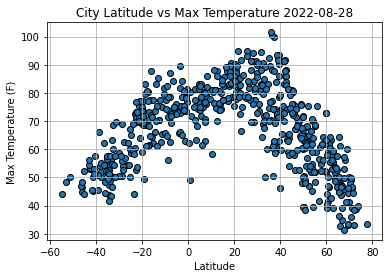

In [32]:
plt.scatter(weather_df['Lat'],weather_df['Max Temp'], edgecolors='black')
plt.title(f'City Latitude vs Max Temperature {year_date_convert}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
#save to outputs/images folder
plt.savefig('output/Chart Images/city_latitude_vs_max_temp.png')
plt.show()

## Latitude vs. Temperature Scatter Plot Analysis
From the randomly generated cities from all over world, I grabbed the temperatures of each city to create a scatter plot between the cities latitude vs the temperature. According to the data visualized, we can infer by the arc provided that all the cities towards the middle have higher temperatures and temperatures start falling the further away you get from latitude 0. The northern hemisphere, the positive latitudes, also have a faster decrease in temperature showing that the cities in the north hemisphere are colder than cities in the south. 

## Latitude vs. Humidity Plot

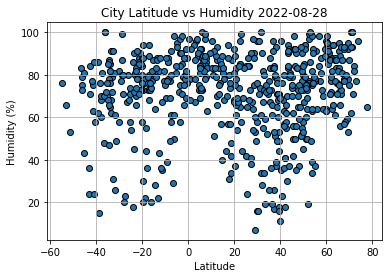

In [33]:
plt.scatter(weather_df['Lat'],weather_df['Humidity'], edgecolors='black')
plt.title(f'City Latitude vs Humidity {year_date_convert}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
#save to outputs/images folder
plt.savefig('output/Chart Images/city_latitude_vs_humidity.png')
plt.show()

## City Latitude vs Humidity Scatter Plot Analysis 
From the randomly generated cities from all over world, I grabbed the humidity of each city to create a scatter plot between the cities latitude vs the humidity. From the scatter plot I created above, we can see that there isn't much of correlation between a cities location and the humidity. 

## Latitude vs. Cloudiness Plot

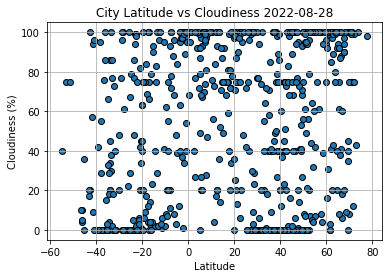

In [35]:
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'], edgecolors='black')
plt.title(f'City Latitude vs Cloudiness {year_date_convert}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
#save to outputs/images folder
plt.savefig('output/Chart Images/city_latitude_vs_cloudiness.png')
plt.show()

## City Latitude vs Cloudiness Scatter Plot Analysis
From the randomly generated cities from all over world, I grabbed the cloudiness of each city to create a scatter plot between the cities latitude vs the cloudiness. Just like the scatter plot from latitude vs humidity, there is no correlation between a cities location and its cloudiness percent.

## Latitude vs. Wind Speed Plot

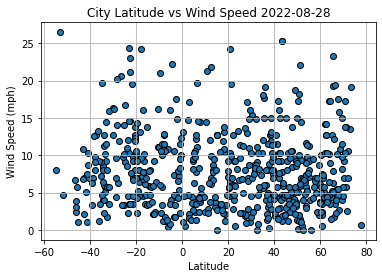

In [36]:
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'], edgecolors='black')
plt.title(f'City Latitude vs Wind Speed {year_date_convert}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
#save to outputs/images folder
plt.savefig('output/Chart Images/city_latitude_vs_Wind Speed.png')
plt.show()

## City Latitude vs Wind Speed Scatter Plot Analysis
From the randomly generated cities from all over world, I grabbed the wind speed of each city to create a scatter plot between the cities latitude vs the wind speed. From the data I visualized above, we can see again that there is not a direct correlation between the cities location and the wind speed.

## Linear Regression

In [121]:
#seperate north and south hemisphere into its own data frames
north_hem = weather_df.loc[weather_df['Lat'] > 0]
                    #north_hem.Lat.unique() no negative lats
south_hem = weather_df.loc[weather_df['Lat'] < 0]
                    #south_hem.Lat.unique() no positive lats
#get linear regression
#make a linear regression define function and plot to not do the same thing 8 times
def plot_lin_regression(x_values,y_values,xtitle,ytitle,x_coord, y_coord):
    #lin regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_value = x_values * slope + intercept
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(rvalue)
    print(line_equation)
    #plotting
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_value, 'r-')
    plt.annotate(line_equation, (x_coord, y_coord), fontsize = 20, color = "red")
    #for some reason the annotate isnt working sometimes so i have also printed the line equation
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.grid(True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

-0.6906441071312325
y = -0.54x + 89.65


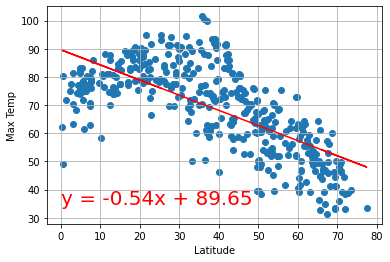

In [132]:
x_values = north_hem['Lat']
y_values = north_hem['Max Temp']

plot_lin_regression(x_values, y_values, 'Latitude', 'Max Temp', 0,35)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

0.7864487844301161
y = 0.7x + 80.05


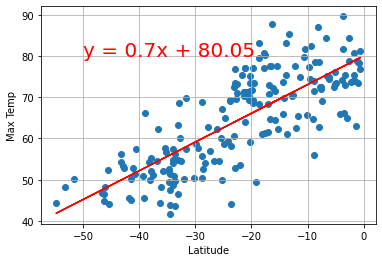

In [131]:
x_values = south_hem['Lat']
y_values = south_hem['Max Temp']

plot_lin_regression(x_values, y_values, 'Latitude', 'Max Temp', -50, 80)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.025082673221692713
y = 0.02x + 71.6


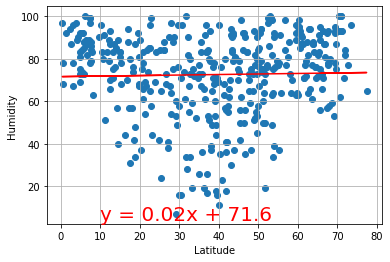

In [124]:
x_values = north_hem['Lat']
y_values = north_hem['Humidity']

plot_lin_regression(x_values, y_values, 'Latitude', 'Humidity', 10, 4)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.14787495765017905
y = 0.21x + 75.87


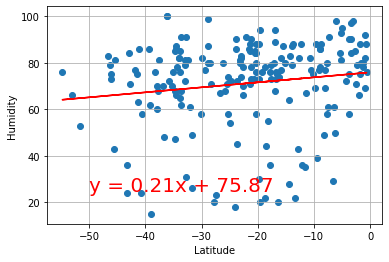

In [130]:
x_values = south_hem['Lat']
y_values = south_hem['Humidity']

plot_lin_regression(x_values, y_values, 'Latitude', 'Humidity', -50, 25)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

-0.017628504962125438
y = -0.03x + 60.01


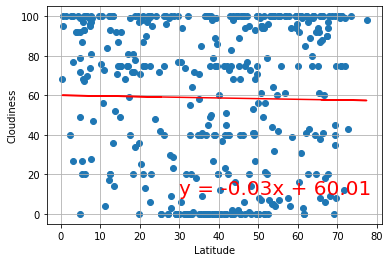

In [126]:
x_values = north_hem['Lat']
y_values = north_hem['Cloudiness']

plot_lin_regression(x_values, y_values, 'Latitude', 'Cloudiness', 30, 10)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.2625181534006691
y = 0.76x + 62.05


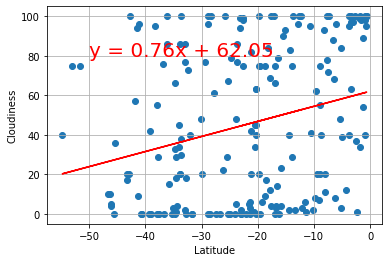

In [133]:
x_values = south_hem['Lat']
y_values = south_hem['Cloudiness']

plot_lin_regression(x_values, y_values, 'Latitude', 'Cloudiness', -50, 80)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0.0362887263310627
y = 0.01x + 7.15


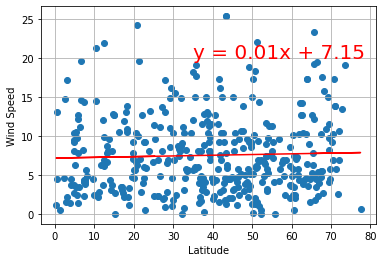

In [137]:
x_values = north_hem['Lat']
y_values = north_hem['Wind Speed']

plot_lin_regression(x_values, y_values, 'Latitude', 'Wind Speed', 35, 20)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

-0.03569889621862473
y = -0.01x + 8.11


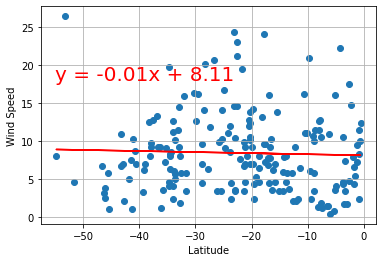

In [139]:
x_values = south_hem['Lat']
y_values = south_hem['Wind Speed']

plot_lin_regression(x_values, y_values, 'Latitude', 'Wind Speed', -55, 18)
plt.show()